In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./data/deceptive-opinion.csv')
df.head()

,deceptive,hotel,polarity,source,text
0,truthful,conrad,positive,TripAdvisor,We stayed for a one night getaway with family ...
1,truthful,hyatt,positive,TripAdvisor,Triple A rate with upgrade to view room was le...
2,truthful,hyatt,positive,TripAdvisor,This comes a little late as I'm finally catchi...
3,truthful,omni,positive,TripAdvisor,The Omni Chicago really delivers on all fronts...
4,truthful,hyatt,positive,TripAdvisor,I asked for a high floor away from the elevato...


In [3]:
df.isnull().sum()

deceptive    0
hotel        0
polarity     0
source       0
text         0
dtype: int64

In [4]:
df.describe()

,deceptive,hotel,polarity,source,text
count,1600,1600,1600,1600,1600
unique,2,20,2,3,1596
top,truthful,conrad,positive,MTurk,The Omni was chosen for it's location whichwor...
freq,800,80,800,800,2


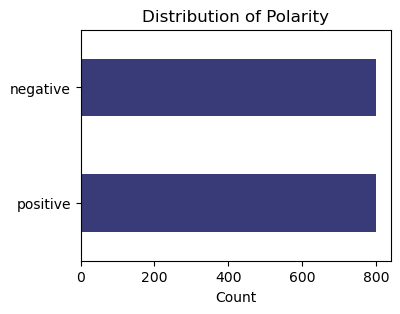

In [5]:
data = df.copy()

# distribution of polarity and distribution of deception
plt.figure(figsize=(4, 3))
data['polarity'].value_counts().plot(kind='barh', colormap='tab20b')
plt.title('Distribution of Polarity')
plt.xlabel('Count')
plt.ylabel('')
plt.show()

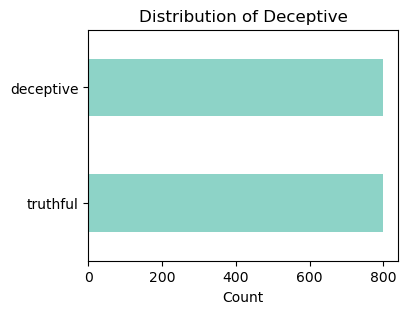

In [6]:
# distribution of deceptive
plt.figure(figsize=(4, 3))
data['deceptive'].value_counts().plot(kind='barh', colormap='Set3')
plt.title('Distribution of Deceptive')
plt.xlabel('Count')
plt.ylabel('')
plt.show()

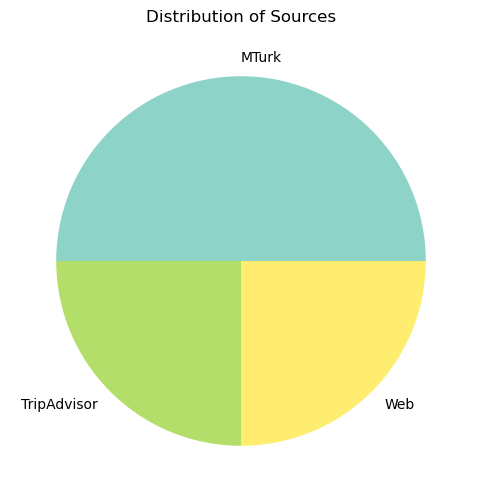

In [7]:
# distribution of sources
plt.figure(figsize=(6, 6))
data['source'].value_counts().plot(kind='pie', colormap='Set3')
plt.title('Distribution of Sources')
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=45)
plt.show()

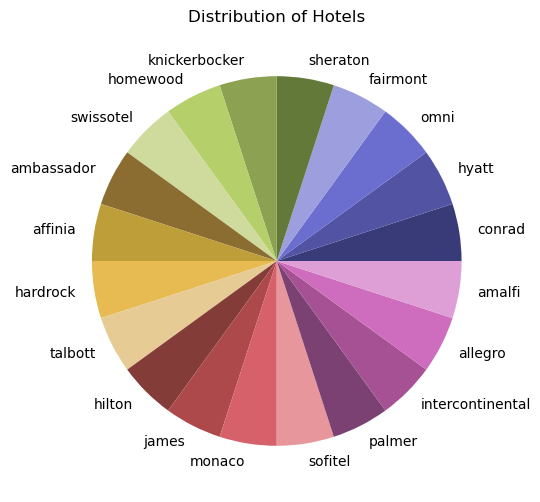

In [8]:
# distribution of hotel
plt.figure(figsize=(10, 6))
data['hotel'].value_counts().plot(kind='pie', colormap='tab20b')
plt.title('Distribution of Hotels')
# plt.xlabel('Hotel')
plt.ylabel('')
plt.xticks(rotation=45)
plt.show()

<Figure size 1000x600 with 0 Axes>

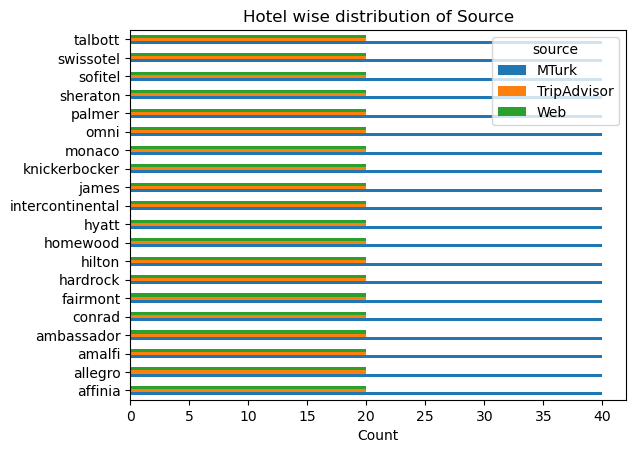

In [9]:
# hotel wise distribution of source
plt.figure(figsize=(10, 6))
data.groupby('hotel')['source'].value_counts().unstack().plot(kind='barh')
plt.title('Hotel wise distribution of Source')
plt.xlabel('Count')
plt.ylabel('')
plt.xticks(rotation=0)
plt.show()

<Figure size 1000x600 with 0 Axes>

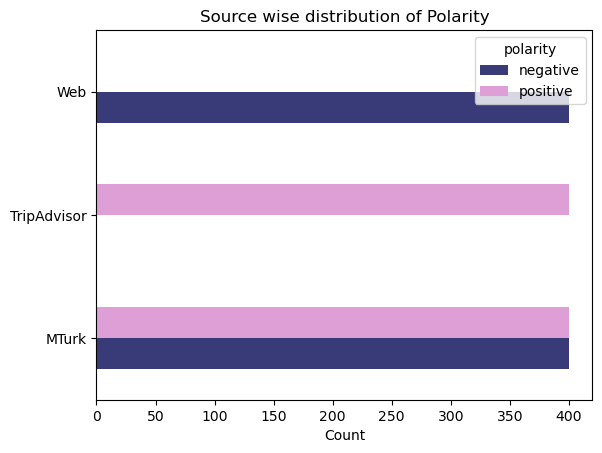

In [10]:
# source wise distribution of polarity
plt.figure(figsize=(10, 6))
data.groupby('source')['polarity'].value_counts().unstack().plot(kind='barh', colormap='tab20b')
plt.title('Source wise distribution of Polarity')
plt.xlabel('Count')
plt.ylabel('')
plt.xticks(rotation=0)
plt.show()

Note : Web has only negetive polarity and no positive polarity

<Figure size 1000x600 with 0 Axes>

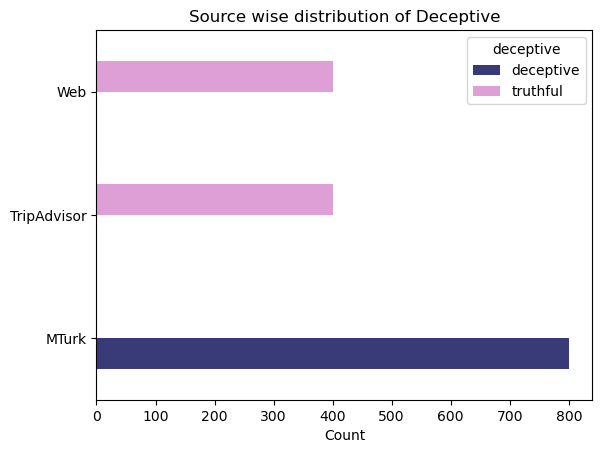

In [11]:
# source wise distribution of deceptive
plt.figure(figsize=(10, 6))
data.groupby('source')['deceptive'].value_counts().unstack().plot(kind='barh', colormap='tab20b')
plt.title('Source wise distribution of Deceptive')
plt.xlabel('Count')
plt.ylabel('')
plt.xticks(rotation=0)
plt.show()

Note : Mobile has only deceptive polarity and no truthful polarity

<Figure size 1000x600 with 0 Axes>

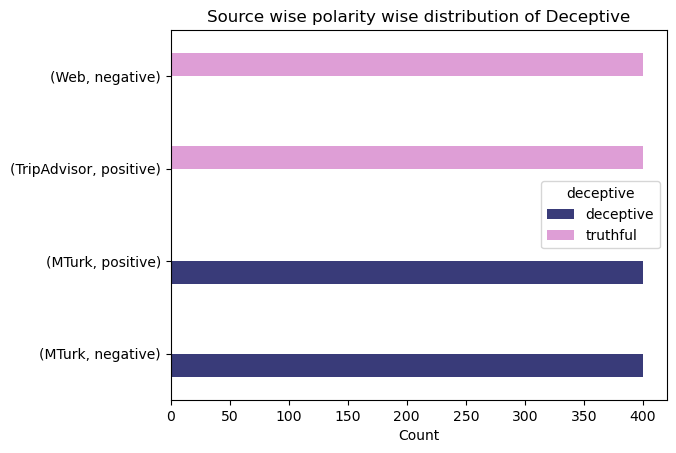

In [12]:
# source wise polarity wise distribution of deceptive
plt.figure(figsize=(10, 6))
data.groupby(['source', 'polarity'])['deceptive'].value_counts().unstack().plot(kind='barh', colormap='tab20b')
plt.title('Source wise polarity wise distribution of Deceptive')
plt.xlabel('Count')
plt.ylabel('')
plt.xticks(rotation=0)
plt.show()

<Figure size 1000x600 with 0 Axes>

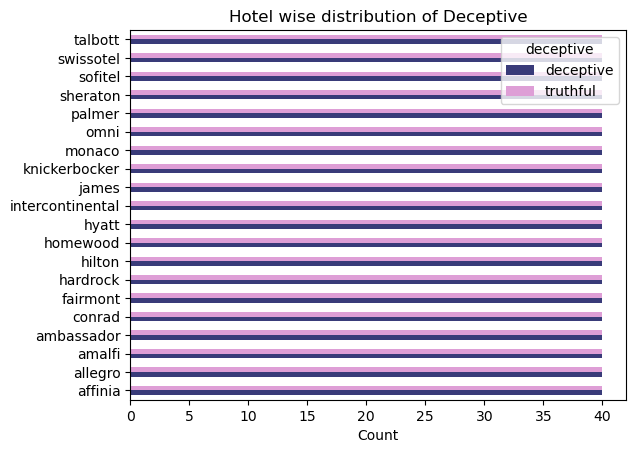

In [13]:
# hotel wise distribution of deceptive
plt.figure(figsize=(10, 6))
data.groupby('hotel')['deceptive'].value_counts().unstack().plot(kind='barh', colormap='tab20b')
plt.title('Hotel wise distribution of Deceptive')
plt.xlabel('Count')
plt.ylabel('')
plt.xticks(rotation=0)
plt.show()


In [22]:
import csv
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords

# Download the NLTK stop words if not already downloaded
nltk.download('stopwords')

# Initialize stop words
stop_words = set(stopwords.words('english'))

# Initialize empty text variables for positive and negative reviews
positive_reviews_text = ""
negative_reviews_text = ""

# Open the CSV file containing the reviews
with open('deceptive-opinion.csv', newline='', encoding='utf-8') as csvfile:
    reader = csv.reader(csvfile)
    
    # Iterate through the rows in the CSV file
    for row in reader:
        review_text = row[4]
        if row[2] == 'positive':
            positive_reviews_text += review_text + " "
        else:
            negative_reviews_text += review_text + " "

# Tokenize the text and remove stop words for positive reviews
positive_words = [word for word in positive_reviews_text.lower().split() if word not in stop_words]

# Tokenize the text and remove stop words for negative reviews
negative_words = [word for word in negative_reviews_text.lower().split() if word not in stop_words]

# get the common words in positive reviews and negative reviews
common_words = [word for word in positive_words if word in negative_words]

# remove the common words from positive reviews and negative reviews
positive_words = [word for word in positive_words if word not in common_words]
negative_words = [word for word in negative_words if word not in common_words]

positive_reviews_text = " ".join(positive_words)
negative_reviews_text = " ".join(negative_words)

# Create a Word Cloud for positive reviews
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews_text)

# Create a Word Cloud for negative reviews
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_reviews_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/dosisiddhesh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


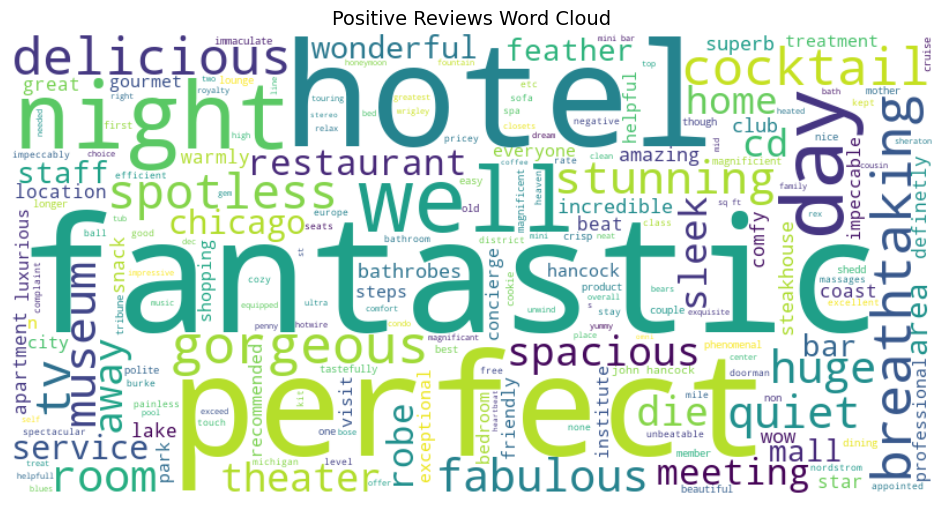

In [23]:
# display positive word cloud
plt.figure(figsize=(12, 6))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Positive Reviews Word Cloud', fontsize=14)
plt.axis('off')
plt.show()

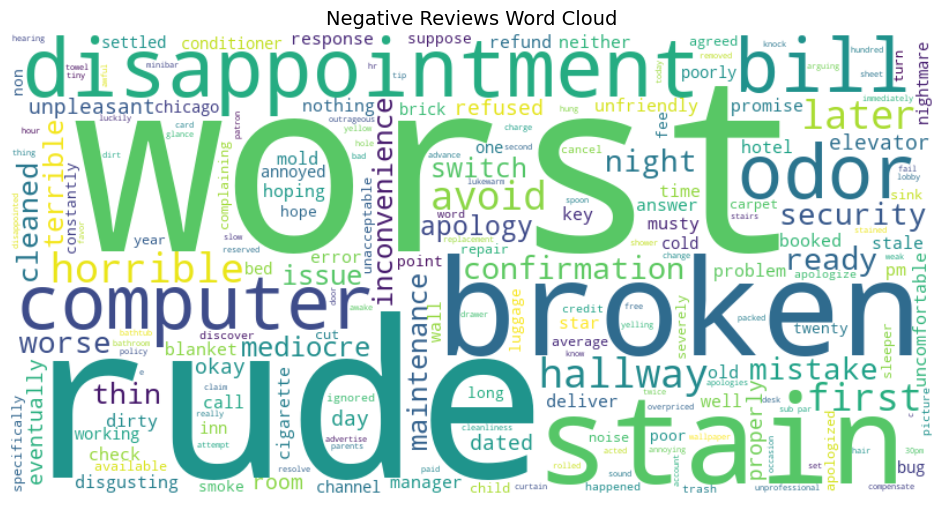

In [24]:
# display negative word cloud
plt.figure(figsize=(12, 6))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Negative Reviews Word Cloud', fontsize=14)
plt.axis('off')
plt.show()